In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
ufo_df = pd.read_csv("ufo_sighting_data.csv", usecols=["latitude", "longitude",'Date_time'])
#print(pd.DataFrame(ufo_df))
meteorite_data = pd.read_csv("meteorite_data.csv")
ufo_data = pd.read_csv("ufo_sighting_data.csv", usecols=['latitude', 'longitude'])

C:\Users\robertaparna\AppData\Local\Temp\ipykernel_16560\1180048926.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv("ufo_sighting_data.csv", usecols=["latitude", "longitude",'Date_time'])
C:\Users\robertaparna\AppData\Local\Temp\ipykernel_16560\1180048926.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv("ufo_sighting_data.csv", usecols=['latitude', 'longitude'])


In [3]:
ufo_df[['Date', 'Time']] = ufo_df['Date_time'].str.split(' ',expand=True)
ufo_df[['Day', 'Month', 'Year']] = ufo_df['Date'].str.split('/', expand =True)

In [4]:
ufo_df.dropna()
ufo_df = ufo_df.reset_index(drop=True)

In [5]:
ufo_df['longitude'] = pd.to_numeric(ufo_df['longitude'], errors='coerce')
ufo_df['latitude'] = pd.to_numeric(ufo_df['latitude'], errors='coerce')
ufo_df['Year'] = pd.to_numeric(ufo_df['Year'], errors='coerce')

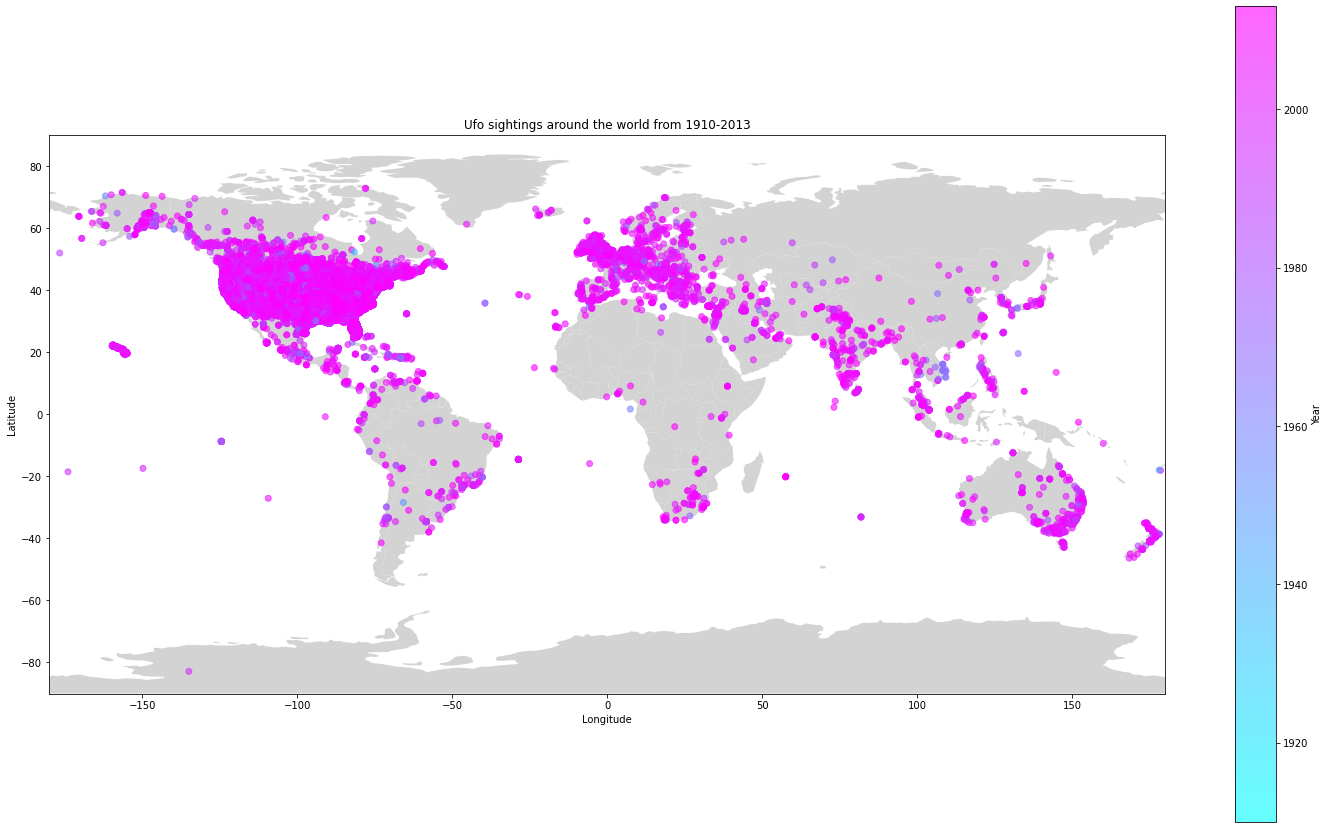

In [6]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(25, 15))
worldmap.plot(color="lightgrey", ax=ax)

x = ufo_df['longitude']
y = ufo_df['latitude']
z = ufo_df['Year']

threshold = 2013

plt.scatter(x, y, c=z, alpha=0.6, vmin=1910, vmax=threshold, cmap='cool')
plt.colorbar(label='Year')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title ('Ufo sightings around the world from 1910-2013')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### METEORITE DATA

In [7]:
meteorite_data['longitude'] = meteorite_data['GeoLocation'].str.split(', ').str[0].str[1:]
meteorite_data['latitude'] = meteorite_data['GeoLocation'].str.split(', ').str[1].str[:-2]
meteorite_data.drop(['GeoLocation'], axis= 1)

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,longitude,latitude
0,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,50.775000,6.08333
1,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,56.183330,10.23333
2,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,54.216670,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,16.883330,-99.90000
4,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,-33.166670,-64.95000
...,...,...,...,...,...,...,...,...,...,...
2823,Zillah 002,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,29.037000,17.01850
2824,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,13.783330,8.96667
2825,Zlin,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,49.250000,17.66667
2826,Zubkovsky,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,49.789170,41.50460


In [8]:
meteorite_data[['Date', 'Time', 'AM/PM']] = meteorite_data['year'].str.split(' ',expand=True)
meteorite_data = meteorite_data.drop(columns=['Time', 'AM/PM'])
meteorite_data[['Day', 'Month', 'Year']] = meteorite_data['Date'].str.split('/', expand =True)

In [9]:
meteorite_data['longitude'] = pd.to_numeric(meteorite_data['longitude'], errors='coerce')
meteorite_data['latitude'] = pd.to_numeric(meteorite_data['latitude'], errors='coerce')
meteorite_data['Year'] = pd.to_numeric(meteorite_data['Year'], errors='coerce')

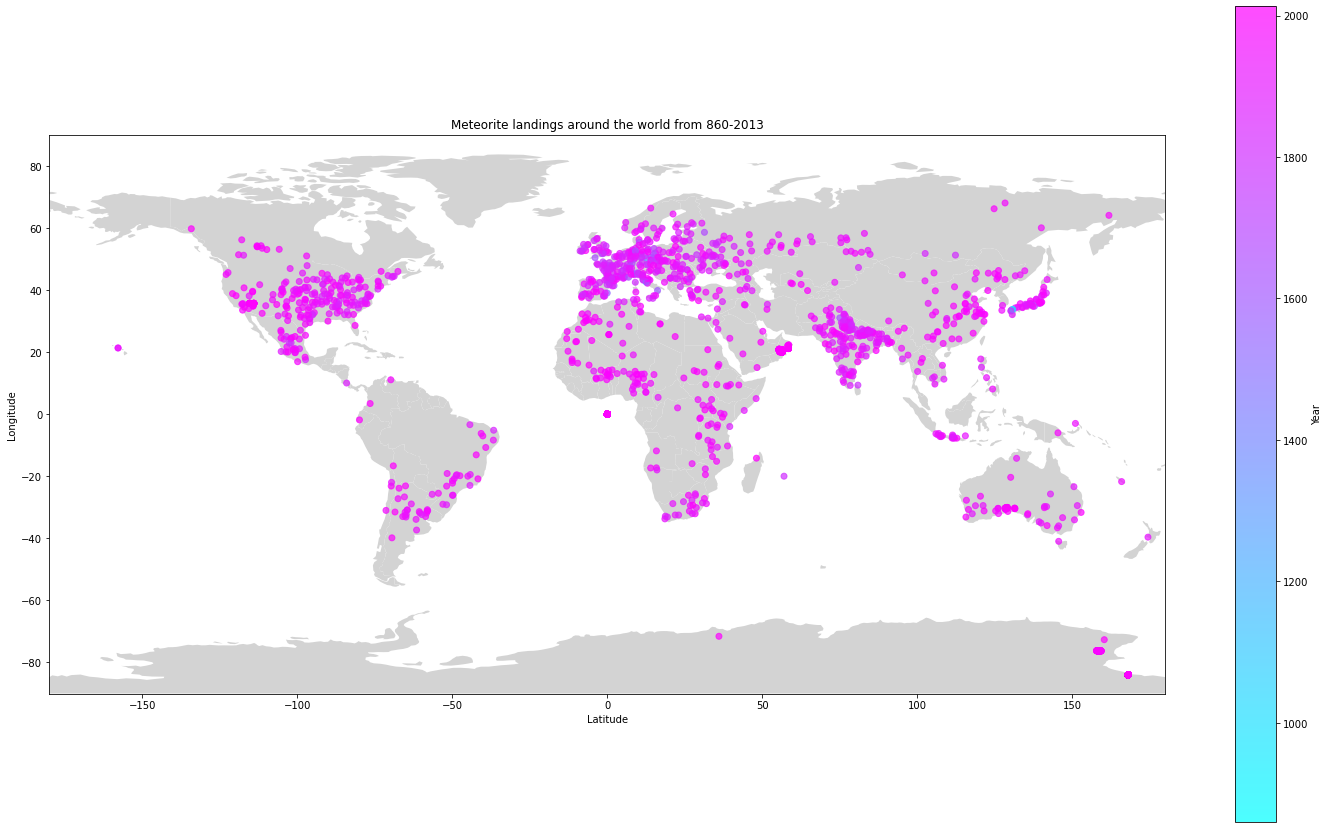

In [10]:
fig, ax = plt.subplots(figsize=(25, 15))
worldmap.plot(color="lightgrey", ax=ax)

x = meteorite_data['latitude']
y = meteorite_data['longitude']
z = meteorite_data['Year']


threshold = 2013

plt.scatter(x, y, c=z, alpha=0.7, vmin=860, vmax=threshold, cmap='cool')
plt.colorbar(label='Year')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title ('Meteorite landings around the world from 860-2013')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [11]:
# cast latitudes and longitudes to numeric
meteorite_data['longitude'] = pd.to_numeric(meteorite_data['longitude'], errors='coerce')
meteorite_data['latitude'] = pd.to_numeric(meteorite_data['latitude'], errors='coerce')
ufo_data['longitude'] = pd.to_numeric(ufo_df['longitude'], errors='coerce')
ufo_data['latitude'] = pd.to_numeric(ufo_df['latitude'], errors='coerce')

In [12]:
#Joining two dataframes
df = pd.concat([ufo_data[['latitude', 'longitude']], meteorite_data[['latitude', 'longitude']]], axis=1, keys= ['ufo_data', 'meteorite_data'])
mask = ((abs(ufo_data['latitude'] - meteorite_data['latitude']) < 0.5)) & ((abs(ufo_data['longitude'] - meteorite_data['longitude']) < 0.5))
df.loc[mask, 'same_place'] = 'Yes'

In [13]:
#pip install geopy

In [14]:
#pip install osmnx

In [15]:
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, acos, sqrt, pi
from geopy import distance
from geopy.geocoders import Nominatim
import osmnx as ox
import networkx as nx

#https://towardsdatascience.com/finding-distance-between-two-latitudes-and-longitudes-in-python-43e92d6829ff
def calculate_distance(lat1, lon1, lat2, lon2, r=6371):
    # Convert degrees to radians
    coordinates = lat1, lon1, lat2, lon2
    # radians(c) is same as c*pi/180
    phi1, lambda1, phi2, lambda2 = [
        radians(c) for c in coordinates
    ]  
    
    # Apply the haversine formula
    a = (np.square(sin((phi2-phi1)/2)) + cos(phi1) * cos(phi2) * 
         np.square(sin((lambda2-lambda1)/2)))
    d = 2*r*asin(np.sqrt(a))
    return d

for index, row in df.iterrows():
    df['distances'] = calculate_distance(row['ufo_data']['latitude'], row['ufo_data']['longitude'],row['meteorite_data']['latitude'], row['meteorite_data']['longitude'])

#Get coordinates in order to plot
indexes = df.index[df['same_place']=='Yes'].tolist()  #Indexes where it is (almost) same place
df.iloc[indexes]
#Find mean of those coordinates for plotting
latitude = (df['ufo_data']['latitude'].iloc[indexes] + df['meteorite_data']['latitude'].iloc[indexes])/2
longitude = (df['ufo_data']['longitude'].iloc[indexes] + df['meteorite_data']['longitude'].iloc[indexes])/2
df.iloc[indexes].shape[0]

In [25]:
meteorite_data

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,longitude,latitude,Date,Day,Month,Year
0,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)",50.77500,6.08333,01/01/1880,01,01,1880.0
1,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)",56.18333,10.23333,01/01/1951,01,01,1951.0
2,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)",54.21667,-113.00000,01/01/1952,01,01,1952.0
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)",16.88333,-99.90000,01/01/1976,01,01,1976.0
4,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)",-33.16667,-64.95000,01/01/1902,01,01,1902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,Zillah 002,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037000, 17.018500)",29.03700,17.01850,01/01/1990,01,01,1990.0
2824,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.783330, 8.966670)",13.78333,8.96667,01/01/1999,01,01,1999.0
2825,Zlin,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.250000, 17.666670)",49.25000,17.66667,01/01/1939,01,01,1939.0
2826,Zubkovsky,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.789170, 41.504600)",49.78917,41.50460,01/01/2003,01,01,2003.0


In [46]:
import geopy.distance

def connected_to_meteorite(longitude, latitude, year):
    connected_meteorites = meteorite_data[(meteorite_data['Year'] == year) & (abs(meteorite_data['latitude'] - latitude) < 11) & (abs(meteorite_data['longitude'] - longitude) < 11)]
    if len(connected_meteorites) > 0:
        connected_meteorites['sightings'] = connected_meteorites.apply(lambda row: close_enough_to_see(latitude, longitude, row.latitude, row.longitude), axis = 1)
        if connected_meteorites['sightings'].sum() > 0:
            return 1
        
    return 0

def close_enough_to_see(lat1, lon1, lat2, lon2):
    try:
        distance = geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).km
        if distance < 1120:
            return 1
    except Exception as e: print(e)
        
    return 0

ufo_df['meteorite'] = ufo_df.apply(lambda row: connected_to_meteorite(row.longitude, row.latitude, row.Year), axis=1)
ufo_df


,Date_time,latitude,longitude,Date,Time,Day,Month,Year,meteorite
0,10/10/1949 20:30,29.883056,-97.941111,10/10/1949,20:30,10,10,1949,0
1,10/10/1949 21:00,29.384210,-98.581082,10/10/1949,21:00,10,10,1949,0
2,10/10/1955 17:00,53.200000,-2.916667,10/10/1955,17:00,10,10,1955,0
3,10/10/1956 21:00,28.978333,-96.645833,10/10/1956,21:00,10,10,1956,0
4,10/10/1960 20:00,21.418056,-157.803611,10/10/1960,20:00,10,10,1960,0
...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,36.165833,-86.784444,9/9/2013,21:15,9,9,2013,0
80328,9/9/2013 22:00,43.613611,-116.202500,9/9/2013,22:00,9,9,2013,0
80329,9/9/2013 22:00,38.297222,-122.284444,9/9/2013,22:00,9,9,2013,0
80330,9/9/2013 22:20,38.901111,-77.265556,9/9/2013,22:20,9,9,2013,0


In [48]:
ufo_df['meteorite'].sum()

782

In [52]:
indexMeteorite = ufo_df[ufo_df['meteorite'] == 0].index
ufo_df.drop(indexMeteorite, inplace=True)
ufo_df

,Date_time,latitude,longitude,Date,Time,Day,Month,Year,meteorite
136,10/10/2004 15:20,55.288131,23.957728,10/10/2004,15:20,10,10,2004,1
309,10/11/1999 20:15,42.038611,-78.341111,10/11/1999,20:15,10,11,1999,1
310,10/11/1999 20:15,42.038611,-78.341111,10/11/1999,20:15,10,11,1999,1
311,10/11/1999 20:15,42.038611,-78.341111,10/11/1999,20:15,10,11,1999,1
312,10/11/1999 20:15,42.038611,-78.341111,10/11/1999,20:15,10,11,1999,1
...,...,...,...,...,...,...,...,...,...
79292,9/5/1999 06:15,43.133889,-70.926944,9/5/1999,06:15,9,5,1999,1
79293,9/5/1999 06:30,38.664444,-80.710000,9/5/1999,06:30,9,5,1999,1
79499,9/6/1999 03:00,44.851944,-71.552222,9/6/1999,03:00,9,6,1999,1
79745,9/7/2003 12:03,46.072735,18.232266,9/7/2003,12:03,9,7,2003,1


plotting ufo sightings that are connected to meteorites

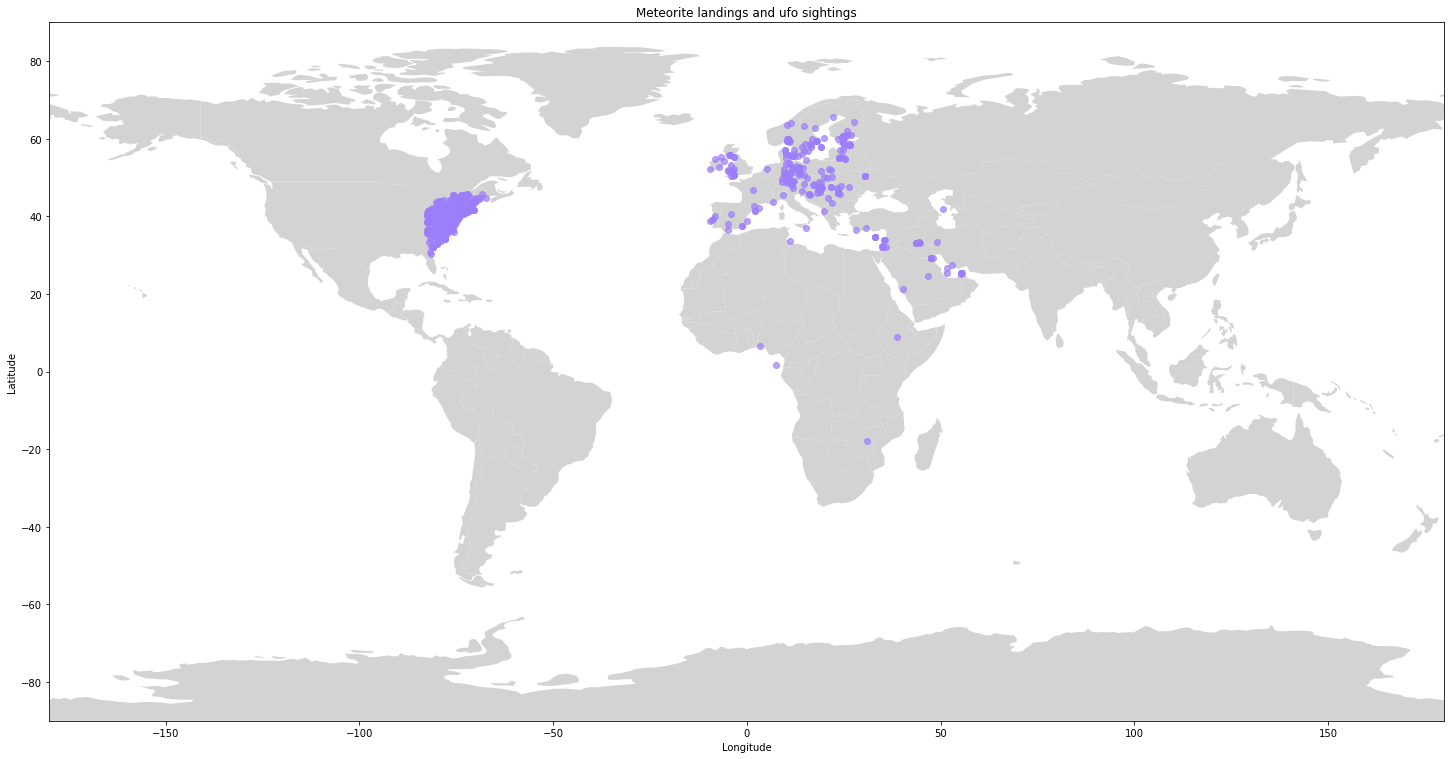

In [55]:
fig, ax = plt.subplots(figsize=(25, 15))
worldmap.plot(color="lightgrey", ax=ax)

y = ufo_df['latitude']
x = ufo_df['longitude']

plt.scatter(x, y, alpha=0.7, color='#9C7DFC')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title ('Meteorite landings and ufo sightings')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()